In [1]:
import pandas as pd

Dataset downloaded from [Kaggle](https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000)

In [14]:
case_types = {
    'akiec' : "Actinic keratoses and intraepithelial carcinoma / Bowen's disease", 
    'bcc': "basal cell carcinoma", 
    'bkl': "benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses)",
    'df': "dermatofibroma", 
    'mel': "melanoma", 
    'nv': "melanocytic nevi",
    'vasc': "vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage)"
}

In [4]:
metadata_df = pd.read_csv('ham_dataset/HAM10000_metadata.csv')
metadata_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [7]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [9]:
metadata_df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [12]:
metadata_df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [16]:
samples_to_select = metadata_df['dx'].value_counts().min()
samples_to_select

115

In [17]:
case_codes = list(case_types.keys())

df_to_concat = []

for case_code in case_codes:
    sample_case_df = metadata_df[metadata_df['dx'] == case_code].sample(samples_to_select)
    df_to_concat.append(sample_case_df)

samples_df = pd.concat(df_to_concat)
samples_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
9969,HAM_0004060,ISIC_0030825,akiec,histo,40.0,male,face
9917,HAM_0006220,ISIC_0024470,akiec,histo,60.0,male,upper extremity
10008,HAM_0001576,ISIC_0033705,akiec,histo,60.0,male,face
9832,HAM_0001624,ISIC_0032277,akiec,histo,85.0,male,scalp
9914,HAM_0005551,ISIC_0029900,akiec,histo,60.0,male,face
...,...,...,...,...,...,...,...
2378,HAM_0007097,ISIC_0034214,vasc,histo,60.0,male,trunk
2408,HAM_0006406,ISIC_0026336,vasc,consensus,50.0,male,trunk
2337,HAM_0005713,ISIC_0030956,vasc,histo,60.0,female,neck
2428,HAM_0005011,ISIC_0026393,vasc,consensus,80.0,male,trunk


In [19]:
# samples_df.to_csv('choosen_sample.csv', index=False)

In [21]:
samples_df = pd.read_csv('choosen_sample.csv')
samples_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0004060,ISIC_0030825,akiec,histo,40.0,male,face
1,HAM_0006220,ISIC_0024470,akiec,histo,60.0,male,upper extremity
2,HAM_0001576,ISIC_0033705,akiec,histo,60.0,male,face
3,HAM_0001624,ISIC_0032277,akiec,histo,85.0,male,scalp
4,HAM_0005551,ISIC_0029900,akiec,histo,60.0,male,face
...,...,...,...,...,...,...,...
800,HAM_0007097,ISIC_0034214,vasc,histo,60.0,male,trunk
801,HAM_0006406,ISIC_0026336,vasc,consensus,50.0,male,trunk
802,HAM_0005713,ISIC_0030956,vasc,histo,60.0,female,neck
803,HAM_0005011,ISIC_0026393,vasc,consensus,80.0,male,trunk


In [ ]:
import os
import shutil

source_dirs = ['ham_dataset/HAM10000_images_part_1', 'ham_dataset/HAM10000_images_part_2']
destination_dir_base = 'ham_sample'

for index, row in samples_df.iterrows():    
    for source_dir in source_dirs:
        file_name = f"{row['image_id']}.jpg"
        destination_dir = f"{destination_dir_base}/{row['dx']}"

        if os.path.exists(os.path.join(source_dir, file_name)):
            if not os.path.exists(destination_dir):
                os.makedirs(destination_dir)

            shutil.copy(os.path.join(source_dir, file_name), os.path.join(destination_dir, file_name))
            print(f"File '{file_name}' copied to '{destination_dir}'.")


In [ ]:
! pip install scikit-image

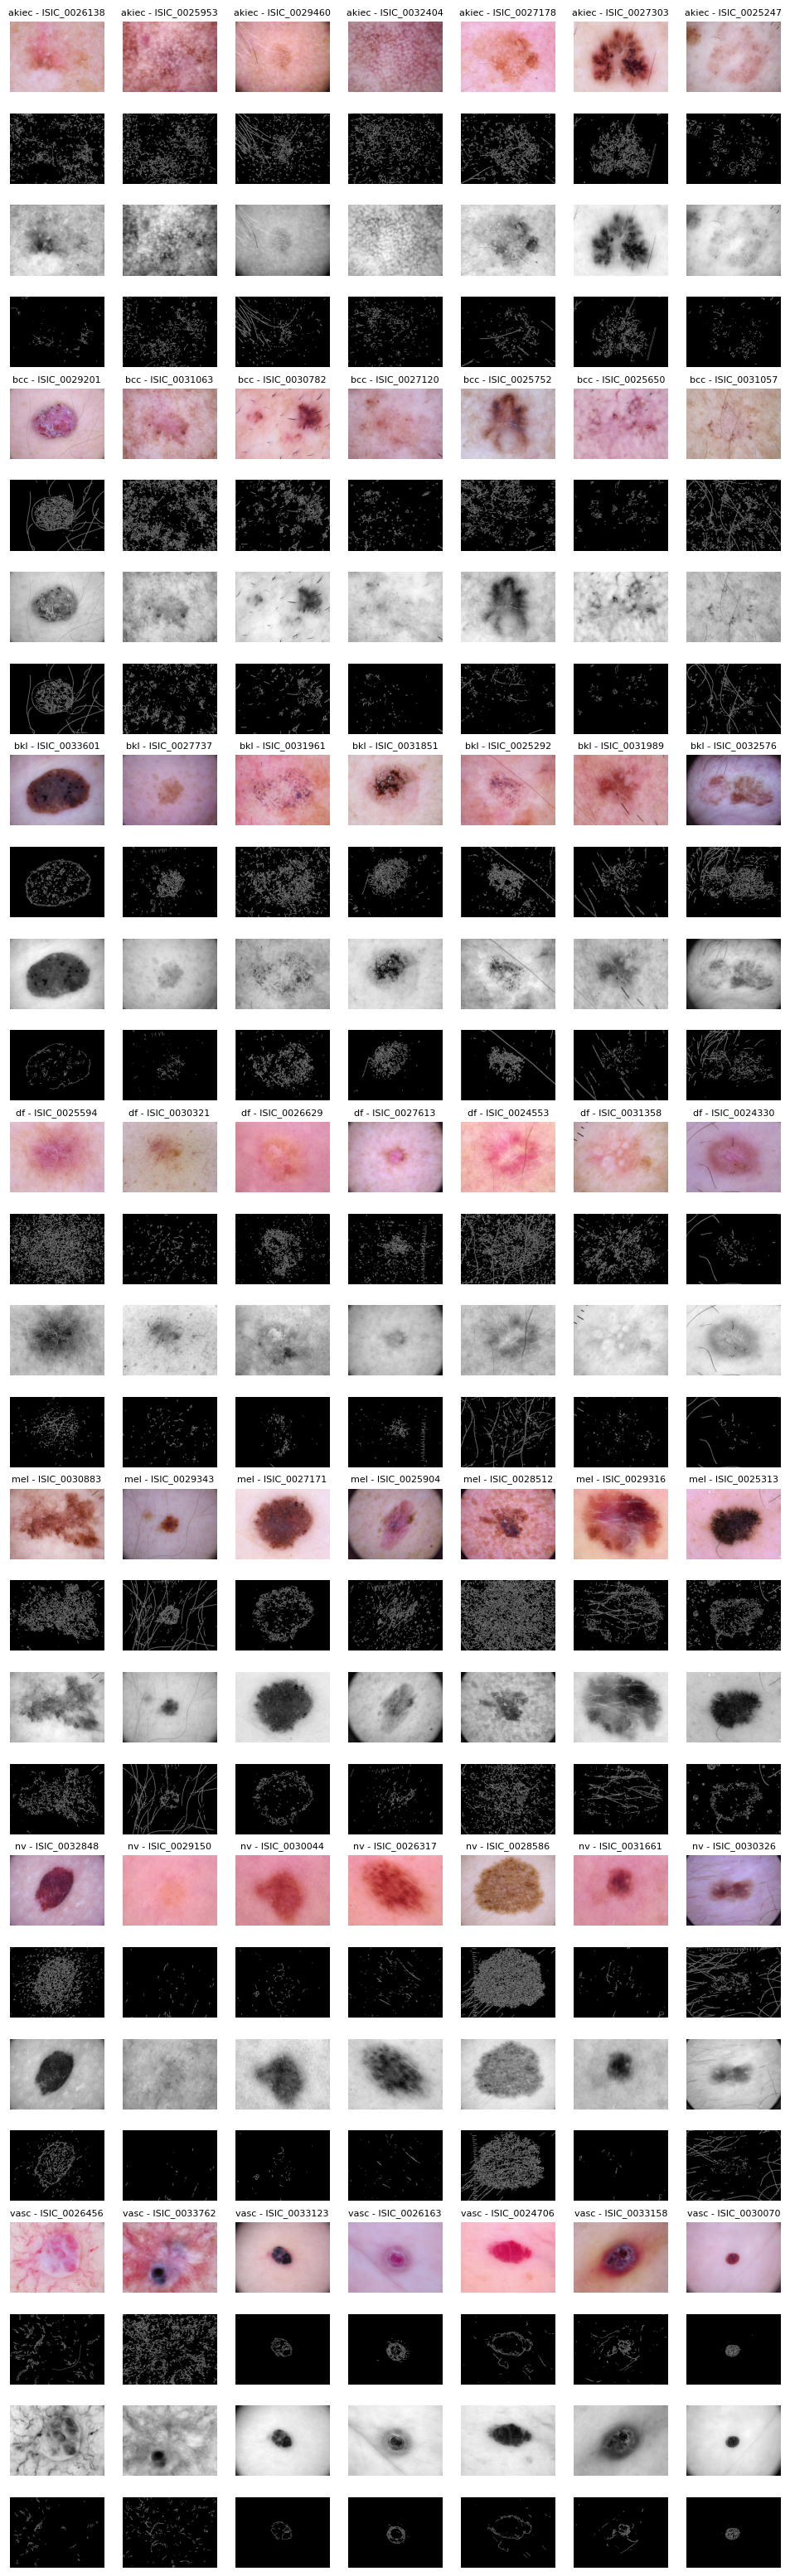

In [86]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_random_images_from_directories(directory_list, num_samples=3):
    proc_functions = 4

    fig, axes = plt.subplots(len(directory_list)*proc_functions, num_samples, figsize=(12, 10*proc_functions))

    for i, directory in enumerate(directory_list):
        images = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

        random_samples = random.sample(images, min(num_samples, len(images)))

        for j, image_name in enumerate(random_samples):
            image_path = os.path.join(directory, image_name)
            img = mpimg.imread(image_path)
            edges = cv2.Canny(img, 50, 100)
            gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            edges_gray = cv2.Canny(gray_img, 50, 100)
                        
            axes[i*proc_functions, j].imshow(img)
            axes[i*proc_functions, j].axis('off')
            axes[i*proc_functions, j].set_title(f"{directory.split('/')[-1]} - {image_name.split('.')[0]}", fontsize=8)
            
            axes[i*proc_functions + 1, j].imshow(edges, cmap='gray')
            axes[i*proc_functions + 1, j].axis('off')
            
            axes[i*proc_functions + 2, j].imshow(gray_img, cmap='gray')
            axes[i*proc_functions + 2, j].axis('off')
            
            axes[i*proc_functions + 3, j].imshow(edges_gray, cmap='gray')
            axes[i*proc_functions + 3, j].axis('off')

            
    plt.show()

directory_list = [f'ham_sample/{specific_dir}' for specific_dir in case_codes]
show_random_images_from_directories(directory_list, 7)

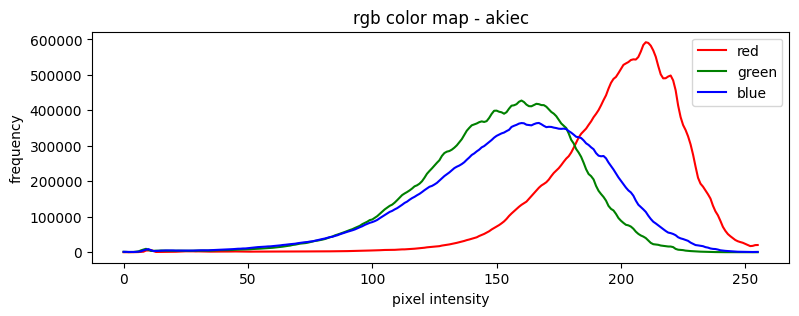

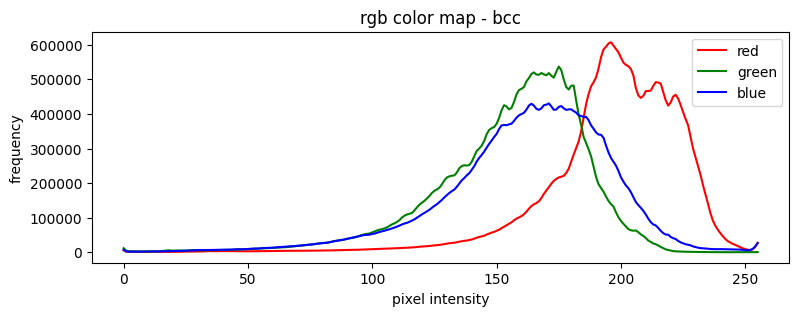

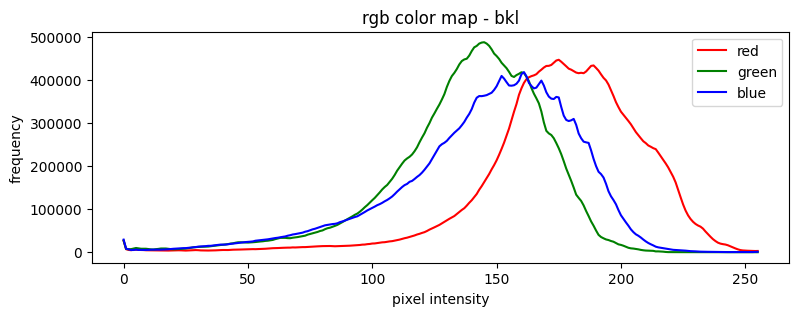

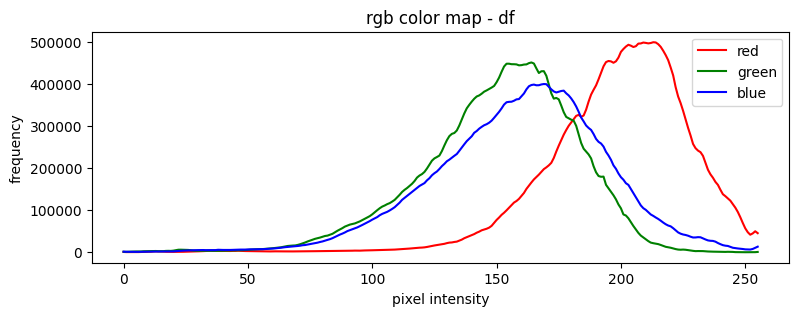

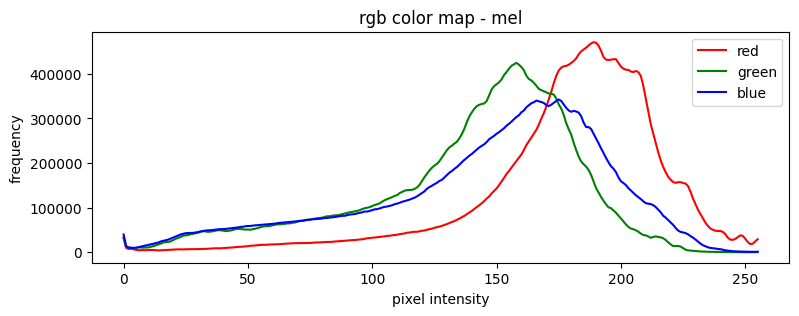

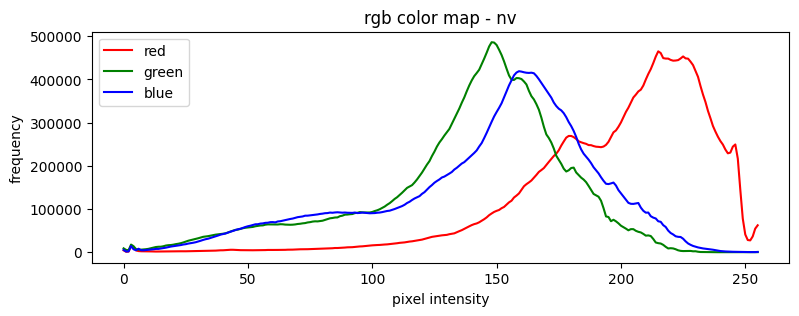

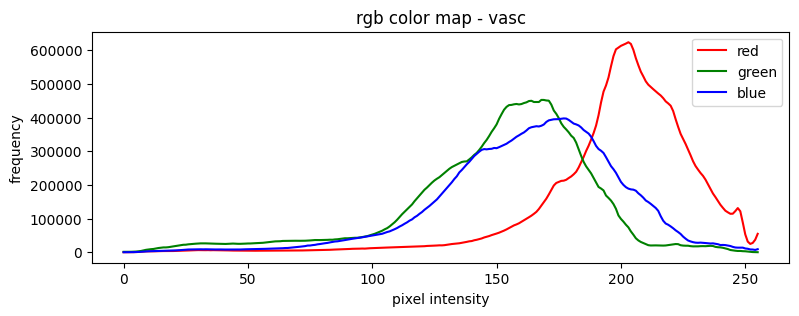

In [79]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_color_distribution(image):
    red_channel = image[:,:,0]
    green_channel = image[:,:,1]
    blue_channel = image[:,:,2]

    hist_red = cv2.calcHist([red_channel], [0], None, [256], [0, 256])
    hist_green = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
    hist_blue = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])

    return hist_red, hist_green, hist_blue

def aggregate_color_maps(image_paths):
    color_maps_red = []
    color_maps_green = []
    color_maps_blue = []

    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        hist_red, hist_green, hist_blue = calculate_color_distribution(image)

        color_maps_red.append(hist_red)
        color_maps_green.append(hist_green)
        color_maps_blue.append(hist_blue)

    overall_color_map_red = np.sum(color_maps_red, axis=0)
    overall_color_map_green = np.sum(color_maps_green, axis=0)
    overall_color_map_blue = np.sum(color_maps_blue, axis=0)

    return overall_color_map_red, overall_color_map_green, overall_color_map_blue

def plot_color_maps(overall_color_map_red, overall_color_map_green, overall_color_map_blue, case_code):
    plt.figure(figsize=(9, 3))
    plt.title(f'rgb color map - {case_code}')
    plt.xlabel('pixel intensity')
    plt.ylabel('frequency')
    plt.plot(overall_color_map_red, color='red', label='red')
    plt.plot(overall_color_map_green, color='green', label='green')
    plt.plot(overall_color_map_blue, color='blue', label='blue')
    plt.legend()
    plt.show()
    
for case_code in case_codes:
    dataset_dir = os.path.join('ham_sample', case_code)
    image_paths = [os.path.join(dataset_dir, filename) for filename in os.listdir(dataset_dir)]
    overall_color_map_red, overall_color_map_green, overall_color_map_blue = aggregate_color_maps(image_paths)
    plot_color_maps(overall_color_map_red, overall_color_map_green, overall_color_map_blue, case_code)